In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colour(c):
    colour = cm.get_cmap(c, 256)
    newcolors = colour(np.linspace(0, 1, 256))
    white = np.array([0, 0, 0, 0])
    newcolors[0] = white
    newcmp = colors.ListedColormap(newcolors)
    return newcmp

def combine(comp, pur, labels, title, newcmp, savename):

    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot(121)
    im1 = ax1.imshow(comp, cmap=newcmp)

    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)

    ax2 = fig.add_subplot(122)
    im2 = ax2.imshow(pur, cmap=newcmp)

    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes('right', size='5%', pad=0.05)
    
    make_matrix(comp, ax1, im1, labels)
    make_matrix(pur, ax2, im2, labels)

    fig.tight_layout(pad=5.0)
    fig.suptitle(title, x=0.52, y=0.75, fontsize=15)
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
#     plt.title(title, fontsize=15)
    ax1.set_title('Completeness', fontsize=15)
    ax2.set_title('Purity', fontsize=15)
    
    plt.show()
    
    fig.savefig('/Users/salmasalhi/PGM_Project_2023/'+savename+'.png', dpi=800, bbox_inches='tight')
    
def make_matrix(matrix, ax, im, labels):

    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticks(np.arange(len(labels)))
   
    ax.set_yticklabels(labels, fontsize=15)
    ax.set_xticklabels(labels, fontsize=15)
    
    plt.setp(ax.get_yticklabels(), rotation=90, ha='center', va='center')
    
    kw = dict(horizontalalignment="center", verticalalignment="center")
    textcolors=("black", "white")
    valfmt="{x:.2f}"
    
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            kw.update(color=textcolors[int(im.norm(matrix[i, j]) > 0.5)])
            text = im.axes.text(j, i, valfmt(matrix[i, j], None), fontsize=15, **kw)
            texts.append(text)
    ax.set_xlabel('Predicted class', fontsize=15)
    ax.set_ylabel('True class', fontsize=15)

        

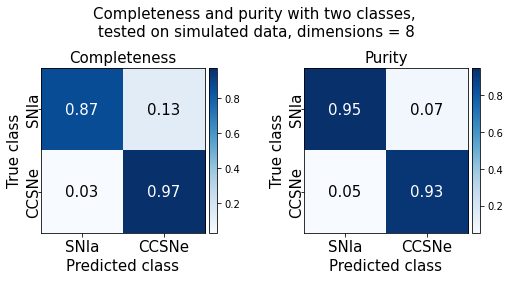

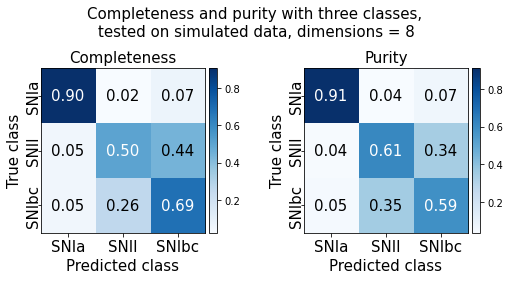

In [6]:
'''SIMULATED DATA ONLY'''

# for pca_num = 12
# 10 = SNIa
# 20 = CCSNe

# PPCA comp and pur for pca_num = 12, ONLY TWO CLASSES
ppca_comp_2 = [[0.868070, 0.131930],[0.028291, 0.971709]]
ppca_pur_2 = [[0.947743, 0.074288],[0.052257, 0.925712]]

# labels 
labels = ['SNIa', 'CCSNe']
c = 'Blues'

combine(np.array(ppca_comp_2), np.array(ppca_pur_2), labels, 'Completeness and purity with two classes, \ntested on simulated data, dimensions = 8', c, 'SNIa_CCSNe_sim')

# PPCA comp and pur for pca_num = 11, THREE CLASSES
# 10 = SNIa, 20 = SNII, 30 = SNIbc

ppca_comp_3 = [[0.904883, 0.024184, 0.070932],[0.053129, 0.504739, 0.442131],[0.053306, 0.259588, 0.687106]]
ppca_pur_3 = [[0.909497, 0.036619, 0.068435],[0.042925, 0.614335, 0.342884],[0.047579, 0.349045, 0.588681]]

# labels
labels3 = ['SNIa', 'SNII', 'SNIbc']

combine(np.array(ppca_comp_3), np.array(ppca_pur_3), labels3, 'Completeness and purity with three classes, \ntested on simulated data, dimensions = 8', c, 'SNIa_SNII_SNIbc_sim')


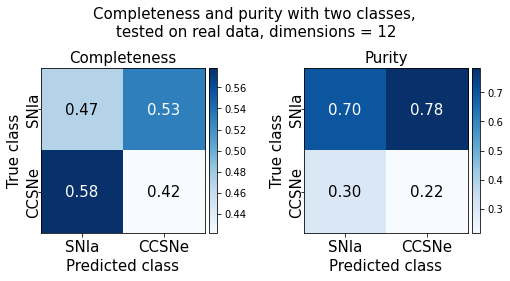

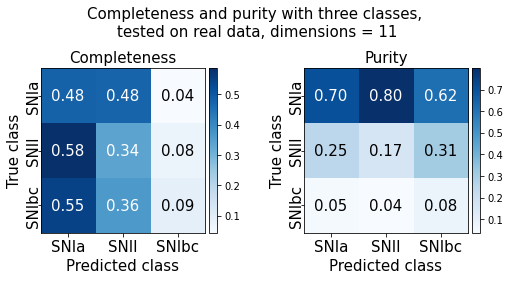

In [3]:
'''SIM TRAIN REAL TEST'''

# for only two classes, pca_num = 12
ppca_real_comp_2 = [[0.469945, 0.530055],[0.578125, 0.421875]]
ppca_real_pur_2 = [[0.699187, 0.782258],[0.300813, 0.217742]]

combine(np.array(ppca_real_comp_2), np.array(ppca_real_pur_2), labels, 'Completeness and purity with two classes, \ntested on real data, dimensions = 12', c, 'SNIa_CCSNe_real')

# for three classes, pca_num = 11

ppca_real_comp_3 = [[0.480874, 0.475410, 0.043716],[0.584906, 0.339623, 0.075472],[0.545455, 0.363636, 0.090909]]
ppca_real_pur_3 = [[0.704, 0.798165, 0.615385],[0.248, 0.165138, 0.307692],[0.048, 0.036697, 0.076923]]

combine(np.array(ppca_real_comp_3), np.array(ppca_real_pur_3), labels3, 'Completeness and purity with three classes, \ntested on real data, dimensions = 11', c, 'SNIa_SNII_SNIbc_real')
